In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../../")
import setigen as stg

from astropy import units as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


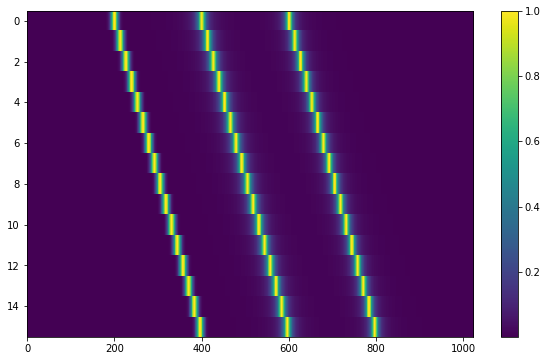

In [94]:
fch1 = 6095.214842353016*u.MHz
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fchans = 1024
tchans = 16

frame = stg.Frame(fchans, tchans, df, dt, fch1)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.lorentzian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], 
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=1),
                          stg.voigt_f_profile(g_width=10*u.Hz, l_width=35*u.Hz),
                          stg.constant_bp_profile(level=1))


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()

# fig.savefig("../doc/source/cookbook/gaussian_profile.png", bbox_inches='tight')
plt.show()

0.47703795147926736


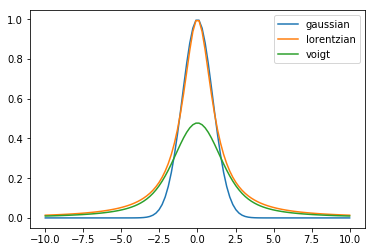

In [76]:
x = np.linspace(-10, 10, 100)
plt.plot(x, stg.func_utils.gaussian(x, 0, 1), label='gaussian')
plt.plot(x, stg.func_utils.lorentzian(x, 0, np.sqrt(2*np.log(2))), label='lorentzian')
plt.plot(x, stg.func_utils.voigt(x, 0, 1, np.sqrt(2*np.log(2))), label='voigt')
print(np.max(stg.func_utils.voigt(x, 0, 1, np.sqrt(2*np.log(2)))))

plt.legend()
plt.show()

In [78]:
stg.func_utils.voigt_fwhm(40, 0)

40.0